In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:

df = pd.read_csv('/content/drive/MyDrive/Train.csv')

print(df.head())


         Date  Price  Open  High   Low     Vol. Change %
0  02/22/2024   91.6  91.1  91.6  90.9  180.10K    0.55%
1  02/21/2024   91.1  91.0  91.4  90.6  255.22K    0.11%
2  02/20/2024   91.0  91.1  91.5  90.3  128.71K    0.00%
3  02/19/2024   91.0  90.0  91.5  89.6  434.43K    1.22%
4  02/16/2024   89.9  89.0  90.0  89.0  169.15K    0.45%


In [4]:
print(df.tail())

            Date  Price   Open   High    Low     Vol. Change %
1158  03/01/2019  88.11  90.67  90.67  87.85   67.67K   -2.27%
1159  02/28/2019  90.16  91.53  91.53  89.82  407.45K   -1.40%
1160  02/27/2019  91.44  92.30  92.39  91.10   11.98K   -0.93%
1161  02/26/2019  92.30  91.70  92.39  91.10   14.20K    1.80%
1162  02/25/2019  90.67  92.21  92.21  89.82  134.06K   -1.04%


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1163 entries, 0 to 1162
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1163 non-null   object 
 1   Price     1163 non-null   float64
 2   Open      1163 non-null   float64
 3   High      1163 non-null   float64
 4   Low       1163 non-null   float64
 5   Vol.      1163 non-null   object 
 6   Change %  1163 non-null   object 
dtypes: float64(4), object(3)
memory usage: 63.7+ KB


In [6]:
df2 = df

In [7]:
df = df.iloc[:, 1:2].values

In [8]:
df.shape,df.shape

((1163, 1), (1163, 1))

In [9]:
sc = MinMaxScaler(feature_range=(0,1))
df_scaled = sc.fit_transform(df)

In [10]:
df_scaled

array([[0.76941553],
       [0.76140913],
       [0.75980785],
       ...,
       [0.76685348],
       [0.7806245 ],
       [0.75452362]])

In [11]:
#creating a data structure with 60 time steps and one output
x_train = []
y_train = []

for i in range(60 , 1163):
  x_train.append(df_scaled[i-60:i,0])
  y_train.append(df_scaled[i,0])

x_train, y_train = np.array(x_train) , np.array(y_train)

In [12]:
x_train

array([[0.76941553, 0.76140913, 0.75980785, ..., 0.67173739, 0.66373098,
        0.66373098],
       [0.76140913, 0.75980785, 0.75980785, ..., 0.66373098, 0.66373098,
        0.63971177],
       [0.75980785, 0.75980785, 0.74219376, ..., 0.66373098, 0.63971177,
        0.64771817],
       ...,
       [0.57758207, 0.58879103, 0.58446757, ..., 0.71353082, 0.71353082,
        0.74635709],
       [0.58879103, 0.58446757, 0.5817454 , ..., 0.71353082, 0.74635709,
        0.76685348],
       [0.58446757, 0.5817454 , 0.56220977, ..., 0.74635709, 0.76685348,
        0.7806245 ]])

In [13]:
y_train

array([0.63971177, 0.64771817, 0.63010408, ..., 0.76685348, 0.7806245 ,
       0.75452362])

In [14]:
x_train.shape

(1103, 60)

In [15]:
x_train = x_train.reshape(1103,60,1)

In [16]:
x_train.shape

(1103, 60, 1)

Buiding LSTM

In [17]:
import tensorflow as tf
model = tf.keras.models.Sequential()

In [18]:
#first LSTM
model.add(tf.keras.layers.LSTM(units = 60, activation= 'relu',return_sequences=True,input_shape=(60,1)))
model.add(tf.keras.layers.Dropout(0.2))

#second LSTM
model.add(tf.keras.layers.LSTM(units = 60, activation= 'relu',return_sequences=True))
model.add(tf.keras.layers.Dropout(0.2))

#third LSTM
model.add(tf.keras.layers.LSTM(units = 80, activation= 'relu',return_sequences=True))
model.add(tf.keras.layers.Dropout(0.2))

#fourth LSTM
model.add(tf.keras.layers.LSTM(units = 60, activation= 'relu'))
model.add(tf.keras.layers.Dropout(0.2))

In [19]:
model.add(tf.keras.layers.Dense(units=1))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 60)            14880     
                                                                 
 dropout (Dropout)           (None, 60, 60)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 60)            29040     
                                                                 
 dropout_1 (Dropout)         (None, 60, 60)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 80)            45120     
                                                                 
 dropout_2 (Dropout)         (None, 60, 80)            0         
                                                                 
 lstm_3 (LSTM)               (None, 60)                3

In [21]:
#compile the model
model.compile(optimizer='adam',loss = 'mean_squared_error')

Training the model

In [22]:
model.fit(x_train,y_train,batch_size=32, epochs=100)

Epoch 1/100
35/35 [==============================] - 9s 108ms/step - loss: 0.0756
Epoch 2/100
35/35 [==============================] - 4s 129ms/step - loss: 0.0182
Epoch 3/100
35/35 [==============================] - 5s 133ms/step - loss: 0.0139
Epoch 4/100
35/35 [==============================] - 4s 107ms/step - loss: 0.0115
Epoch 5/100
35/35 [==============================] - 4s 112ms/step - loss: 0.0112
Epoch 6/100
35/35 [==============================] - 5s 149ms/step - loss: 0.0098
Epoch 7/100
35/35 [==============================] - 4s 107ms/step - loss: 0.0083
Epoch 8/100
35/35 [==============================] - 4s 109ms/step - loss: 0.0084
Epoch 9/100
35/35 [==============================] - 5s 154ms/step - loss: 0.0082
Epoch 10/100
35/35 [==============================] - 4s 108ms/step - loss: 0.0072
Epoch 11/100
35/35 [==============================] - 4s 108ms/step - loss: 0.0068
Epoch 12/100
35/35 [==============================] - 5s 150ms/step - loss: 0.0070
Epoch 13/100


Making Predictions

In [34]:
test_data = pd.read_csv('/content/drive/MyDrive/Test.csv')

In [35]:
test_data.shape

(20, 7)

In [36]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      20 non-null     object 
 1   Price     20 non-null     float64
 2   Open      20 non-null     float64
 3   High      20 non-null     float64
 4   Low       20 non-null     float64
 5   Vol.      20 non-null     object 
 6   Change %  20 non-null     object 
dtypes: float64(4), object(3)
memory usage: 1.2+ KB


In [37]:
real_stock_price = test_data.iloc[:,1:2].values

In [38]:
real_stock_price.shape

(20, 1)

In [39]:
#getting predicted stock prices
dataset_total = pd.concat((df2['Price'], test_data['Price']), axis=0)
inputs = dataset_total[len(dataset_total)-len(test_data)-60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs) #feature scaling

x_test = []
for i in range(60,80):
  x_test.append(inputs[i-60:i,0])

x_test= np.array(x_test)

x_test= np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

predicted = model.predict(x_test)
predicted = sc.inverse_transform(predicted)



1/1 [==============================] - 0s 42ms/step


In [40]:
print(predicted[5]), print(real_stock_price[0])

[88.01119]
[91.6]


(None, None)

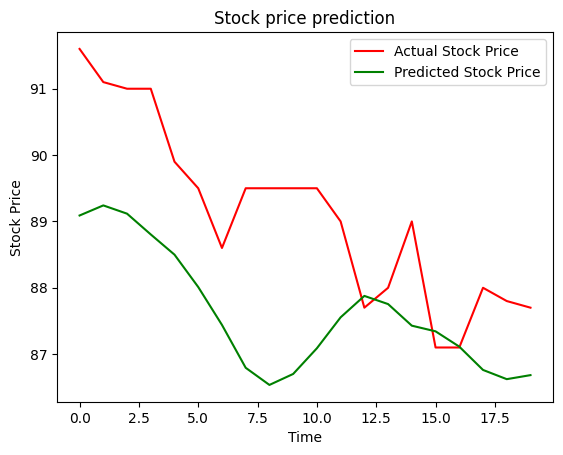

In [50]:
plt.plot(real_stock_price, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted, color = 'green', label = 'Predicted Stock Price')
plt.title('Stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [52]:
# Calculate RMSE
rmse = np.sqrt(np.mean((predicted - real_stock_price) ** 2))
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 1.7616797027015298
